In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as ks
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense,Dropout

In [2]:
# Loading the dataset
customer=pd.read_csv("customer_churn.csv")
pd.set_option('display.max_columns',None)

# DATA EXPLORAION

In [3]:
# displaying the first 5 rows with data
customer.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
# displaying the last 5 rows with data
customer.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [5]:
# displaing the data frame info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# displaying the number of rows and columns
customer.shape

(7043, 21)

In [7]:
# check the number of missing values
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#  display the number of unique values
customer.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [9]:
# generate summary statistics of the numerical columns in dataset
customer.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

# EXPLORATORY DATA ANALYSIS

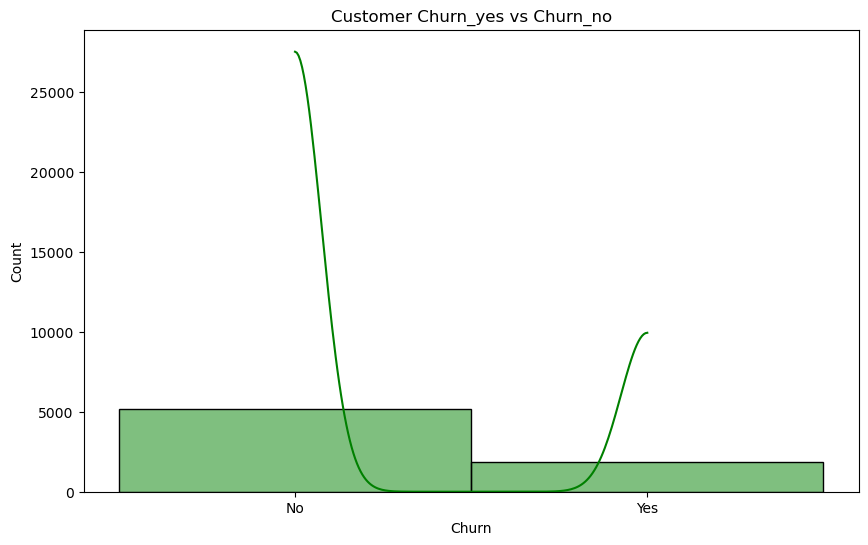

In [10]:
#  Customer Churn Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=customer, x='Churn', kde=True,color="green")
plt.title("Customer Churn_yes vs Churn_no")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([[ 777.,  495.,  401.,  430.,  388.,  386.,  380.,  425.,  455.,
         1037.],
        [ 835.,  264.,  169.,  126.,  107.,  108.,   72.,   70.,   46.,
           72.]]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 2 BarContainer objects>)

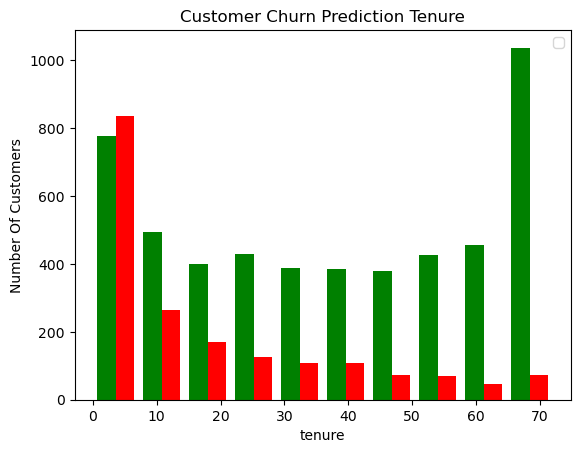

In [11]:
# Customer churn prediction tenure
tenure_churn_no=customer[customer.Churn=='No'].tenure
tenure_churn_yes=customer[customer.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number Of Customers')
plt.title('Customer Churn Prediction Tenure')
plt.legend()
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([[1458.,  134.,  246.,  487.,  420.,  545.,  598.,  550.,  485.,
          251.],
        [ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

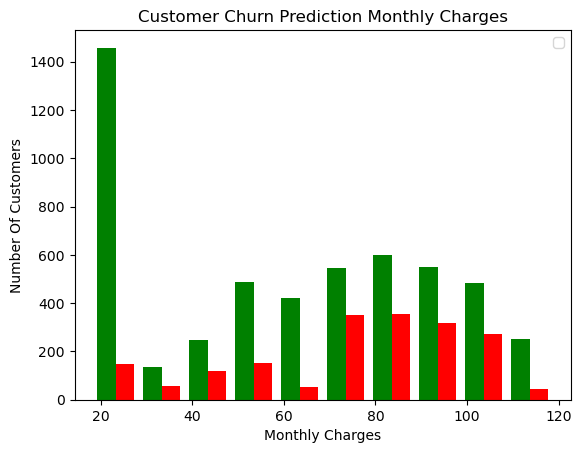

In [12]:
# Customer churn prediction Monthly Charges
tenure_churn_no=customer[customer.Churn=='No'].MonthlyCharges
tenure_churn_yes=customer[customer.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number Of Customers')
plt.title('Customer Churn Prediction Monthly Charges')
plt.legend()
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])

# Tasks to be done:

# A) Data Manipulation: 

a. Find the total number of male customers

In [13]:
sum(customer['gender']=="Male") 

3555

b. Find the total number of customers whose Internet Service is ‘DSL’

In [14]:
sum(customer['InternetService']=="DSL")

2421

c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the 
result in ‘new_customer’

In [15]:
new_customer=customer[(customer['gender']=='Female') & 
(customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')] 
new_customer.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139  0390-DCFDQ  Female              1     Yes         No       1   
176  2656-FMOKZ  Female              1      No         No      15   
267  3197-ARFOY  Female              1      No         No      19   
451  5760-WRAHC  Female              1      No         No      22   
470  4933-IKULF  Female              1      No         No      17   

    PhoneService MultipleLines InternetService       OnlineSecurity  \
139          Yes            No     Fiber optic                   No   
176          Yes           Yes     Fiber optic                   No   
267          Yes            No     Fiber optic                  Yes   
451          Yes            No             DSL                  Yes   
470          Yes            No              No  No internet service   

            OnlineBackup     DeviceProtection          TechSupport  \
139                   No                   No                   No   
176                   No                   No                   No   
267                  Yes                   No                  Yes   
451                   No                  Yes                  Yes   
470  No internet service  No internet service  No internet service   

             StreamingTV      StreamingMovies        Contract  \
139                   No                   No  Month-to-month   
176                   No                   No  Month-to-month   
267                  Yes                  Yes  Month-to-month   
451                   No                  Yes  Month-to-month   
470  No internet service  No internet service        One year   

    PaperlessBilling PaymentMethod  MonthlyCharges TotalCharges Churn  
139              Yes  Mailed check           70.45        70.45   Yes  
176              Yes  Mailed check           74.45       1145.7   Yes  
267              Yes  Mailed check          105.00      2007.25    No  
451              Yes  Mailed check           69.75       1545.4    No  
470               No  Mailed check           20.65        330.6    No

d. Extract all those customers whose tenure is less than 10 months or their Total charges is less 
than 500$ & store the result in ‘new_customer’

Before doing the process we have to change the data types of TotalCharges column

In [16]:
# Totalcharges is objective
customer.TotalCharges.dtypes

dtype('O')

In [17]:
# Checking values of TotalCharges
customer.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
# Displaying the empty values of TotalCharges column
customer[pd.to_numeric(customer.TotalCharges,errors='coerce').isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [19]:
#Removing Empty values of column
customer=customer[customer.TotalCharges!=' ']

In [20]:
# Displaying values
pd.to_numeric(customer.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [21]:
# Changing Objective type of TotalCharges to Integer
customer.TotalCharges=pd.to_numeric(customer.TotalCharges)

In [22]:
#d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
new_customer=customer[(customer['tenure']<10) | (customer['TotalCharges']<500)] 
new_customer.head() 

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
2  3668-QPYBK    Male              0      No         No       2          Yes   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
2                No             DSL            Yes          Yes   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
7  No phone service             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
2               No          No          No              No  Month-to-month   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
7               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
2              Yes      Mailed check           53.85        108.15   Yes  
4              Yes  Electronic check           70.70        151.65   Yes  
5              Yes  Electronic check           99.65        820.50   Yes  
7               No      Mailed check           29.75        301.90    No

# B) Data Visualization:

a. Build a pie-chart to show the distribution of customers would be churning out

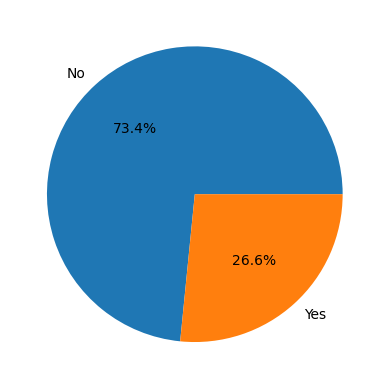

In [23]:
names = customer["Churn"].value_counts().keys().tolist() 
sizes= customer["Churn"].value_counts().tolist()  
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

b. Build a bar-plot to show the distribution of ‘Internet Service’

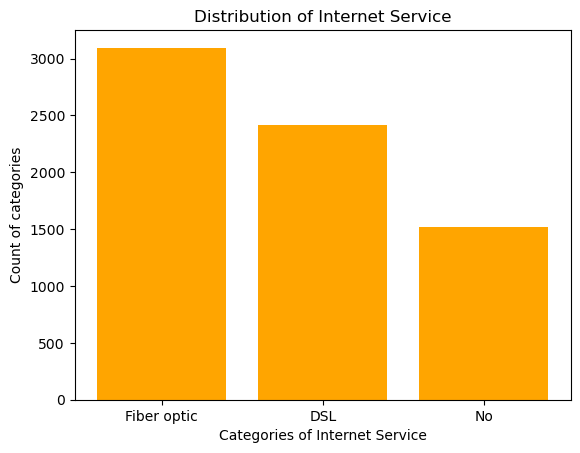

In [24]:
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')  
plt.xlabel('Categories of Internet Service') 
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service') 
plt.show()

# Before Model Building Data Cleaning

In [25]:
# Displaying the unique values
for column in customer:
    print(customer[column].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [26]:
def print_unique_col_value(customer):
    for column in customer:
        if customer[column].dtypes=='object':
            print(f'{column}: {customer[column].unique()}')

In [27]:
print_unique_col_value(customer)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
# Replacing the values of same meaning
customer.replace('No phone service','No',inplace=True)
customer.replace('No internet service','No',inplace=True)

In [29]:
# Replacing gender values of male=1 & female=0
customer.gender=customer.gender.replace('Male',1)
customer.gender=customer.gender.replace('Female',0)

In [30]:
# Creating yes_no_columns and replacing with 1 and 0 values respectively
yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
               "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in yes_no_columns:
    customer[col].replace({'Yes':1,"No":0},inplace=True)

In [31]:
# Checking again for the unique value columns
print_unique_col_value(customer)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [32]:
# Using one-hot-encoding for remaining three columns
customer=pd.get_dummies(data=customer,columns=["InternetService","Contract","PaymentMethod"])

In [33]:
# Finaly checking the columns
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
customer.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [35]:
# Removing Unnecessary column
customer.drop('customerID',axis="columns",inplace=True)

In [36]:
customer.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [37]:
# checking the top 10 value
customer.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   
5       0              0        0           0       8             1   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   
8       0              0        1           0      28             1   
9       1              0        0           1      62             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              0               0             1                 0            0   
1              0               1             0                 1            0   
2              0               1             1                 0            0   
3              0               1             0                 1            1   
4              0               0             0                 0            0   
5              1               0             0                 1            0   
6              1               0             1                 0            0   
7              0               1             0                 0            0   
8              1               0             0                 1            1   
9              0               1             1                 0            0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0            0                0                 1           29.85   
1            0                0                 0           56.95   
2            0                0                 1           53.85   
3            0                0                 0           42.30   
4            0                0                 1           70.70   
5            1                1                 1           99.65   
6            1                0                 1           89.10   
7            0                0                 0           29.75   
8            1                1                 1          104.80   
9            0                0                 0           56.15   

   TotalCharges  Churn  InternetService_DSL  InternetService_Fiber optic  \
0         29.85      0                    1                            0   
1       1889.50      0                    1                            0   
2        108.15      1                    1                            0   
3       1840.75      0                    1                            0   
4        151.65      1                    0                            1   
5        820.50      1                    0                            1   
6       1949.40      0                    0                            1   
7        301.90      0                    1                            0   
8       3046.05      1                    0                            1   
9       3487.95      0                    1                            0   

   InternetService_No  Contract_Month-to-month  Contract_One year  \
0                   0                        1                  0   
1                   0                        0                  1   
2                   0                        1                  0   
3                   0                        0                  1   
4                   0                        1                  0   
5                   0                        1                  0   
6                   0                        1                  0   
7                   0                        1                  0   
8                   0                        1                  0   
9                   0                     

In [38]:
# Checking the tail 10 value
customer.tail(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
7033       1              0        0           0      38             1   
7034       0              0        0           0      67             1   
7035       1              0        0           0      19             1   
7036       0              0        0           0      12             0   
7037       0              0        0           0      72             1   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
7033              0               0             0                 0   
7034              1               1             1                 1   
7035              0               0             0                 0   
7036              0               0             1                 1   
7037              0               0             0                 0   
7038              1               1             0                 1   
7039              1               0             1                 1   
7040              0               1             0                 0   
7041              1               0             0                 0   
7042              0               1             0                 1   

      TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  \
7033            0            0                0                 1   
7034            0            1                0                 1   
7035            0            1                0                 1   
7036            1            1                1                 0   
7037            0            0                0                 1   
7038            1            1                1                 1   
7039            0            1                1                 1   
7040            0            0                0                 1   
7041            0            0                0                 1   
7042            1            1                1                 1   

      MonthlyCharges  TotalCharges  Churn  InternetService_DSL  \
7033           69.50       2625.25      0                    0   
7034          102.95       6886.25      1                    0   
7035           78.70       1495.10      0                    0   
7036           60.65        743.30      0                    1   
7037           21.15       1419.40      0                    0   
7038           84.80       1990.50      0                    1   
7039          103.20       7362.90      0                    0   
7040           29.60        346.45      0                    1   
7041           74.40        306.60      1                    0   
7042          105.65       6844.50      0                    0   

      InternetService_Fiber optic  InternetService_No  \
7033                            1                   0   
7034                            1                   0   
7035                            1                   0   
7036                            0                   0   
7037                            0                   1   
7038                            0                   0   
7039                            1                   0   
7040                            0                   0   
7041                            1                   0   
7042                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
7033                        1                  0                  0   
7034                        1                  0                  0   
7035                        1                  0                  0   
7036      

In [39]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
customer[cols_to_scale]=scaler.fit_transform(customer[cols_to_scale])

In [40]:
# Displaying top 5 raws and tail 5 raws
customer

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        1           0  0.000000             0   
1          1              0        0           0  0.464789             1   
2          1              0        0           0  0.014085             1   
3          1              0        0           0  0.619718             0   
4          0              0        0           0  0.014085             1   
...      ...            ...      ...         ...       ...           ...   
7038       1              0        1           1  0.323944             1   
7039       0              0        1           1  1.000000             1   
7040       0              0        1           1  0.140845             0   
7041       1              1        1           0  0.042254             1   
7042       1              0        0           0  0.915493             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                 0               0             1                 0   
1                 0               1             0                 1   
2                 0               1             1                 0   
3                 0               1             0                 1   
4                 0               0             0                 0   
...             ...             ...           ...               ...   
7038              1               1             0                 1   
7039              1               0             1                 1   
7040              0               1             0                 0   
7041              1               0             0                 0   
7042              0               1             0                 1   

      TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  \
0               0            0                0                 1   
1               0            0                0                 0   
2               0            0                0                 1   
3               1            0                0                 0   
4               0            0                0                 1   
...           ...          ...              ...               ...   
7038            1            1                1                 1   
7039            0            1                1                 1   
7040            0            0                0                 1   
7041            0            0                0                 1   
7042            1            1                1                 1   

      MonthlyCharges  TotalCharges  Churn  InternetService_DSL  \
0           0.115423      0.001275      0                    1   
1           0.385075      0.215867      0                    1   
2           0.354229      0.010310      1                    1   
3           0.239303      0.210241      0                    1   
4           0.521891      0.015330      1                    0   
...              ...           ...    ...                  ...   
7038        0.662189      0.227521      0                    1   
7039        0.845274      0.847461      0                    0   
7040        0.112935      0.037809      0                    1   
7041        0.558706      0.033210      1                    0   
7042        0.869652      0.787641      0                    0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7038                            0                   0   
7039                            1                   0   
7040                            0                   0   
7041                            1               

# C) Model Building:

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
   ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm 
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix 
vi. Plot the ‘Accuracy vs Epochs’ graph

In [41]:
#Selecting Dependent variable &bIndependent variable
x=customer[['tenure']] 
y=customer[['Churn']] 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [42]:
# Importing keras library and adding layers
from keras.models import Sequential 
from keras.layers import Dense 
model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [43]:
# Building the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [44]:
# Testing
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 

Epoch 1/150
154/154 [==============================] - 1s 2ms/step - loss: 0.6501 - accuracy: 0.6300 - val_loss: 0.5818 - val_accuracy: 0.7341
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7343 - val_loss: 0.5316 - val_accuracy: 0.7341
Epoch 3/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7343 - val_loss: 0.5212 - val_accuracy: 0.7341
Epoch 4/150
154/154 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.7343 - val_loss: 0.5163 - val_accuracy: 0.7341
Epoch 5/150
154/154 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7343 - val_loss: 0.5144 - val_accuracy: 0.7341
Epoch 6/150
154/154 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7343 - val_loss: 0.5138 - val_accuracy: 0.7341
Epoch 7/150
154/154 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7343 - val_loss: 0.5136 - val_accuracy: 0.7341

In [45]:
# Mean Validation Accuracy
np.mean(model.history.history['val_accuracy']) 

0.7553585902849833

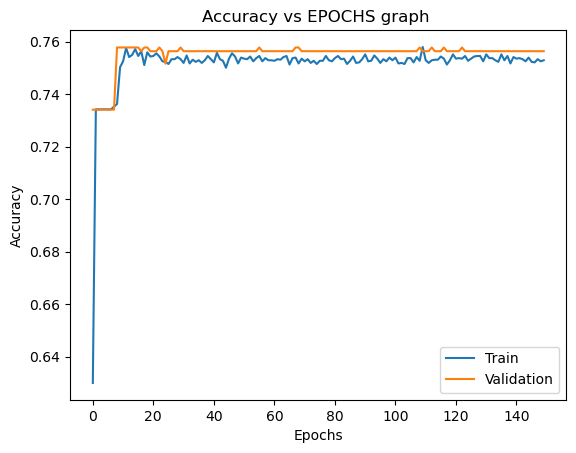

In [46]:
# Graph Accuracy vs Epochs
from matplotlib import pyplot as plt 
plt.plot(model.history.history['accuracy']) 
plt.plot(model.history.history['val_accuracy']) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs EPOCHS graph ")
plt.legend(["Train","Validation"])

plt.show()

In [47]:
# Predicting
y_pred=model.predict(x_test) 
y_pred=(y_pred > 0.5)
from sklearn.metrics import confusion_matrix,accuracy_score 
cm=confusion_matrix(y_test,y_pred) 
accuracy=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy)

66/66 [==============================] - 0s 2ms/step
[[1392  157]
 [ 357  204]]
0.7563981042654029


In [48]:
#Selecting Dependent variable &bIndependent variable
x=customer[['tenure']] 
y=customer[['Churn']] 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [49]:
# creating Input,hidden and output layers
model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(8, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))

In [50]:
# Testing 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 

Epoch 1/150
154/154 [==============================] - 3s 6ms/step - loss: 0.6528 - accuracy: 0.6755 - val_loss: 0.5920 - val_accuracy: 0.7341
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5696 - accuracy: 0.7343 - val_loss: 0.5402 - val_accuracy: 0.7341
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5472 - accuracy: 0.7343 - val_loss: 0.5298 - val_accuracy: 0.7341
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5419 - accuracy: 0.7343 - val_loss: 0.5246 - val_accuracy: 0.7341
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5426 - accuracy: 0.7343 - val_loss: 0.5226 - val_accuracy: 0.7341
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5375 - accuracy: 0.7343 - val_loss: 0.5206 - val_accuracy: 0.7341
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5311 - accuracy: 0.7343 - val_loss: 0.5186 - val_accuracy: 0.7341

In [51]:
# Mean Validation Accuracy
np.mean(model.history.history['val_accuracy']) 

0.7341232299804688

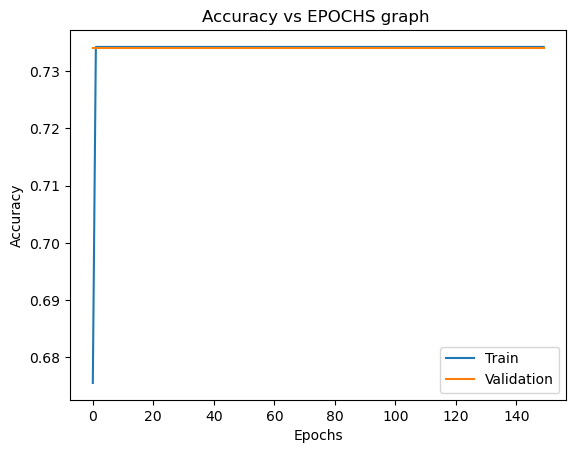

In [52]:
# Graph Accuracy vs Epochs
from matplotlib import pyplot as plt 
plt.plot(model.history.history['accuracy']) 
plt.plot(model.history.history['val_accuracy']) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs EPOCHS graph ")
plt.legend(["Train","Validation"])

plt.show()

In [53]:
# Prediction
y_pred=model.predict(x_test) 
y_pred=(y_pred > 0.5)
from sklearn.metrics import confusion_matrix,accuracy_score 
cm=confusion_matrix(y_test,y_pred) 
accuracy=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy)

66/66 [==============================] - 0s 2ms/step
[[1549    0]
 [ 561    0]]
0.7341232227488151


In [54]:
# Selecting Dependent and Independent variable for the testing
x=customer[['MonthlyCharges','tenure','TotalCharges']] 
y=customer[['Churn']]

In [55]:
# Importing train test split library and splitting the values 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [56]:
# Adding the layers in sequential model and testing with necessity loss,optimizer,metrics and testing
model = Sequential() 
model.add(Dense(12, input_dim=3, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 

Epoch 1/150
154/154 [==============================] - 2s 6ms/step - loss: 0.6011 - accuracy: 0.7095 - val_loss: 0.5311 - val_accuracy: 0.7341
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4937 - accuracy: 0.7511 - val_loss: 0.4802 - val_accuracy: 0.7735
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4638 - accuracy: 0.7895 - val_loss: 0.4710 - val_accuracy: 0.7735
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4563 - accuracy: 0.7905 - val_loss: 0.4665 - val_accuracy: 0.7744
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4531 - accuracy: 0.7911 - val_loss: 0.4649 - val_accuracy: 0.7801
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4508 - accuracy: 0.7901 - val_loss: 0.4639 - val_accuracy: 0.7730
Epoch 7/150
154/154 [==============================] - 792s 5s/step - loss: 0.4508 - accuracy: 0.7883 - val_loss: 0.4643 - val_accuracy: 0.773

In [57]:
# Mean Validation Accuracy
np.mean(model.history.history['val_accuracy']) 

0.7798167459170023

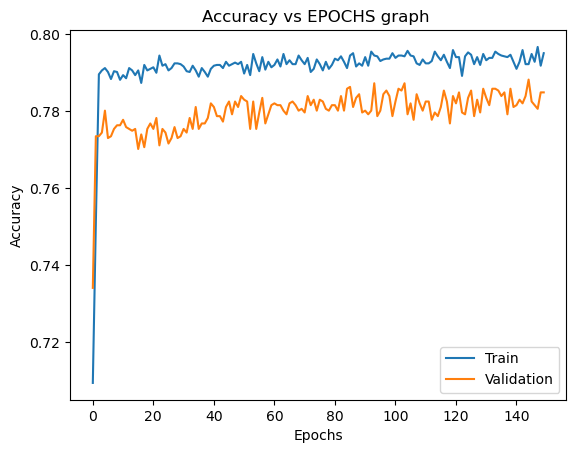

In [58]:
# Plot the graph Accuracy vs Epochs
from matplotlib import pyplot as plt 
plt.plot(model.history.history['accuracy']) 
plt.plot(model.history.history['val_accuracy']) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs EPOCHS graph ")
plt.legend(["Train","Validation"])

plt.show()

In [59]:
# Prediction
y_pred=model.predict(x_test) 
y_pred=(y_pred > 0.5)
from sklearn.metrics import confusion_matrix,accuracy_score 
cm=confusion_matrix(y_test,y_pred) 
accuracy=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy)

66/66 [==============================] - 0s 2ms/step
[[1393  156]
 [ 298  263]]
0.7848341232227488


# CONCLUSION

The first model gave us a mean validation accuracy of 75.22%, the second model had accuracy 
of 73.41 and the third model had a mean validation accuracy of 77.30%. 
The second model gave us the least accuracy because we added two dropout layers with high 
probabilities of dropout.
Now, there could be many factors why third model’s accuracy was less than that of first model. 
Most probably one or more of the features used during the model building could be of less 
significance leading to the reduction in accuracy. 
It should also be kept in mind that these accuracy values are very specific to the 
hyperparameters used during the model building process such as optimizers, activation 
functions and number of epochs. If we were to tweak these hyperparameters we would get 
completely different accuracy values for all the three models.